In [1]:
import mglearn

import sklearn
import numpy as np
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
import warnings
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

warnings.filterwarnings(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
# 模型评估
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 创建一个模拟数据集
X, y = make_blobs(random_state=0)

# 将数据和标签划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 将模型实例化，并用它来拟合训练集
logreg = LogisticRegression().fit(X_train, y_train)

# 在测试集上评估该模型
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

Test set score: 0.88


In [6]:
# 交叉验证
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()

logreg = LogisticRegression(max_iter=500)

scores = cross_val_score(logreg, iris.data, iris.target, cv=3)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.98 0.96 0.98]


In [7]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [8]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.97


In [2]:
# 分层K折交叉验证
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris labels:\n{}".format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


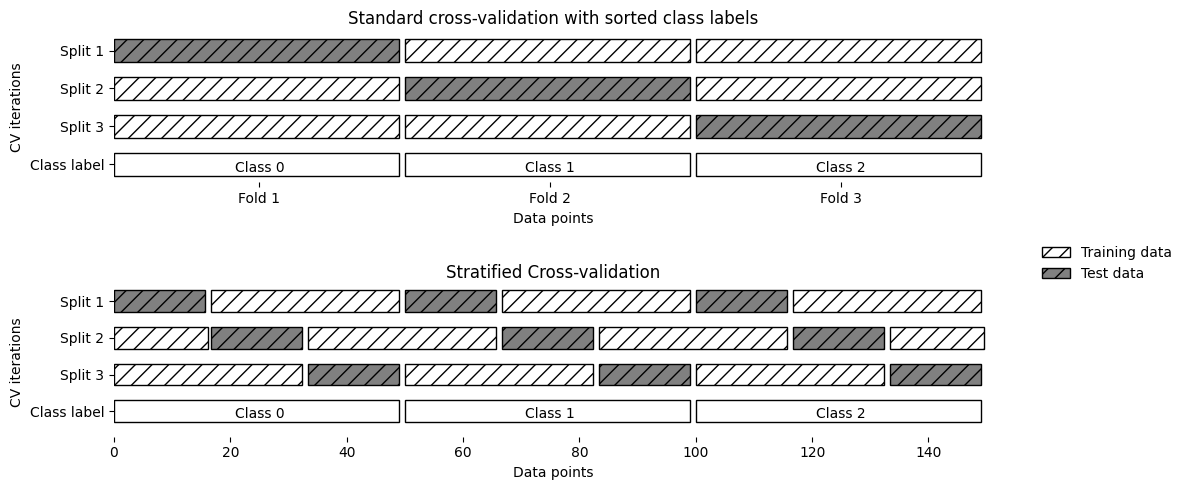

In [3]:
mglearn.plots.plot_stratified_cross_validation()

In [6]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=500)
kfold = KFold(n_splits=5)

print("Cross-validation scores:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[1.         1.         0.86666667 0.93333333 0.83333333]


In [7]:
kfold = KFold(n_splits=3)
print("Cross-validation scores:\n{}".format(
 cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0. 0. 0.]


In [8]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Cross-validation scores:\n{}".format(
 cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0.98 0.96 0.96]


In [9]:
# 留一法 - 每次划分，保留单个数据点作为测试集
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv iterations:  150
Mean accuracy: 0.97


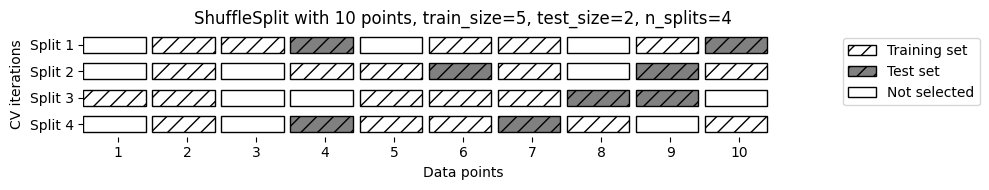

In [10]:
# 打乱划分交叉验证
mglearn.plots.plot_shuffle_split()

In [11]:
from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.92       0.93333333 0.98666667 0.98666667 0.96       0.94666667
 0.98666667 0.97333333 0.97333333 0.85333333]


In [15]:
# 分组交叉验证
from sklearn.model_selection import GroupKFold
from sklearn.datasets import make_blobs

# 创建模拟数据集
X, y = make_blobs(n_samples=12, random_state=0)
# 假设前3个样本属于同一组，接下来的4个属于同一组，以此类推
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.75       0.6        0.66666667]


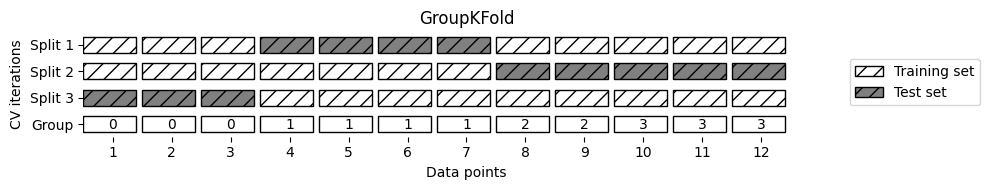

In [16]:
mglearn.plots.plot_group_kfold()

In [17]:
# 网格搜索
# 简单的网格搜索实现
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

print("Size of training set: {} size of test set: {}".format(X_train.shape[0], X_test.shape[0]))

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 对每种参数组合都训练一个SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # 在测试集上评估SVC
        score = svm.score(X_test, y_test)
        # 如果我们得到了更高的分数，则保存该分数和对应的参数
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 112 size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


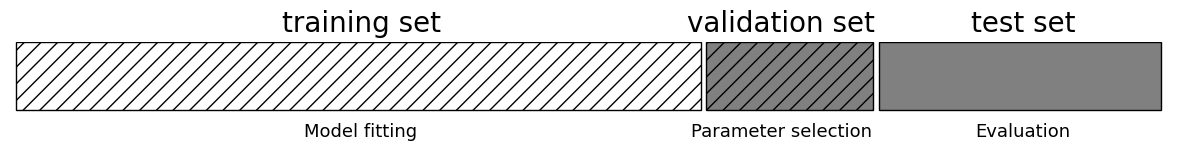

In [18]:
mglearn.plots.plot_threefold_split()

In [19]:
from sklearn.svm import SVC

# 将数据划分为训练+验证集与测试集
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)

# 将训练+验证集划分为训练集与验证集
X_train, X_valid, y_train, y_valid = train_test_split(
X_trainval, y_trainval, random_state=1)
print("Size of training set: {} size of validation set: {} size of test set: {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 对每种参数组合都训练一个SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # 在验证集上评估SVC
        score = svm.score(X_valid, y_valid)
        # 如果我们得到了更高的分数，则保存该分数和对应的参数
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# 在训练+验证集上重新构建一个模型，并在测试集上进行评估
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 84 size of validation set: 28 size of test set: 38

Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


In [13]:
# 带交叉验证的网格搜索
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

iris = load_iris()
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 对每种参数组合都训练一个SVC
        svm = SVC(gamma=gamma, C=C)

        # 执行交叉验证
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)

        # 计算交叉验证的平均精度
        score = np.mean(scores)

        # 如果我们得到的更高的分数，则保存该分数和对应的参数
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# 在训练+验证集上重新构建一个模型
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, gamma=0.1)

ValueError: The number of FixedLocator locations (21), usually from a call to set_ticks, does not match the number of labels (36).

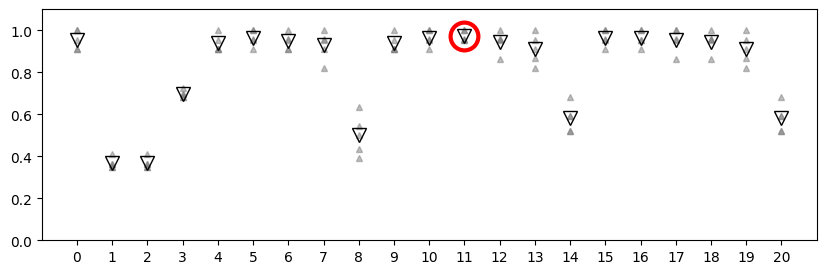

In [14]:
mglearn.plots.plot_cross_val_selection()

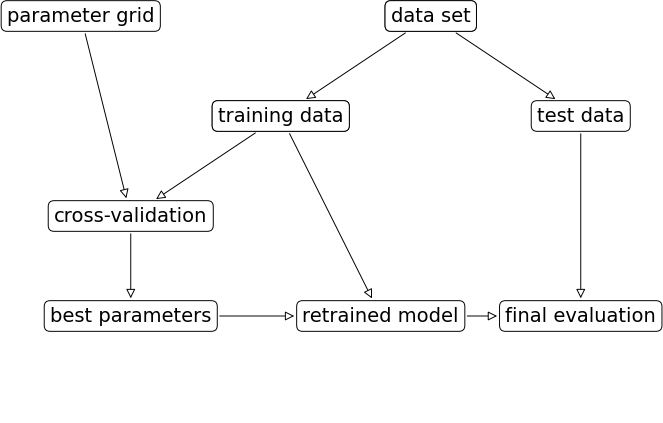

In [15]:
mglearn.plots.plot_grid_search_overview()

In [16]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [19]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [20]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


In [21]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.97


In [22]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=10, gamma=0.1)


In [23]:
# 转换为DataFrame（数据框）
results = pd.DataFrame(grid_search.cv_results_)
# 显示前5行
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.0008,0.00040,0.0004,0.00049,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.0006,0.00049,0.0006,0.00049,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.0008,0.00040,0.0006,0.00049,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.0006,0.00049,0.0006,0.00049,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.0006,0.00049,0.0006,0.00049,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


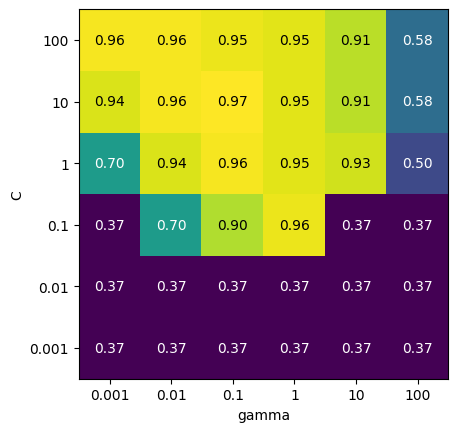

In [25]:
scores = np.array(results.mean_test_score).reshape(6, 6)

# 对交叉验证平均分数作图
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

In [ ]:
# 评估指标
# 二分类指标
